In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from functions import derivatives_kit as df

In [4]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

In [5]:
S = 102
K = 100
r = 0.01
T = 0.3
sigma = 0.3 
q = 0

call = df.STKOption("C", S, K, T, r, sigma, q=q)
call.price()

7.81670791192056

In [6]:
call.greeks()

{'Delta': 0.59, 'Gamma': 0.04, 'Vega': 32.82}

In [7]:
put = df.STKOption("P", S, K, T, r, sigma, q=q)
put.price()

5.517157462257863

In [8]:
put.greeks()

{'Delta': -0.41, 'Gamma': 0.04, 'Vega': 32.82}

In [55]:
SS = np.linspace(80,120,100)
#S = 100
r = 0.01
T = 0.25
sigma = 0.3 
q = 0

K1 = 90
K2 = 100
K3 = 110

call1 = [ df.STKOption("C", s, K1, T, r, sigma, q=q) for s in SS ]
call2 = [ df.STKOption("C", s, K2, T, r, sigma, q=q) for s in SS ]
call3 = [ df.STKOption("C", s, K3, T, r, sigma, q=q) for s in SS ]

In [63]:
K = np.linspace(80,120,100)
S = 100
r = 0.01
T = 0.25
sigma = 0.3 
q = 0

Call1 = [ df.STKOption("C", S, k, T, r, sigma, q=q) for k in K ]

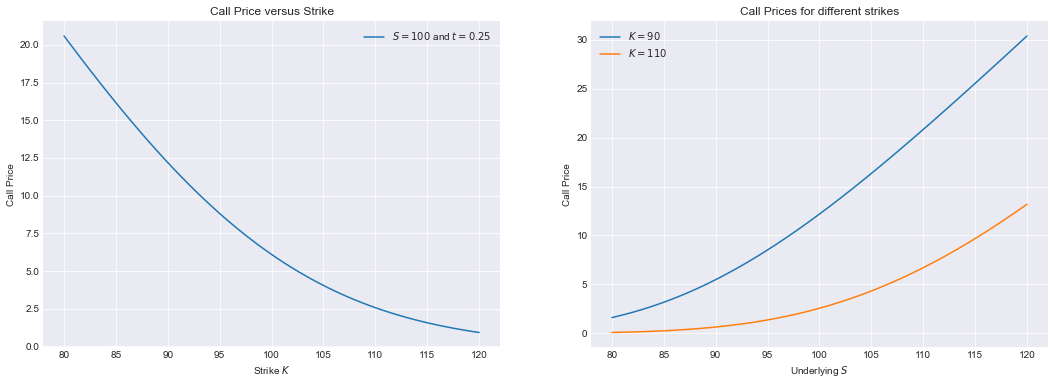

In [72]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

ax[0].plot(K, [c.price() for c in Call1], label="$S={:.0f}$ and $t=0.25$".format(S))
ax[0].set_title("Call Price versus Strike")
ax[0].set_xlabel("Strike $K$")
ax[0].set_ylabel("Call Price")
ax[0].grid()
ax[0].legend()

ax[1].plot(SS, [c.price() for c in call1], label="$K={:.0f}$".format(K1))
ax[1].plot(SS, [c.price() for c in call3], label="$K={:.0f}$".format(K3))
ax[1].set_title("Call Prices for different strikes")
ax[1].set_xlabel("Underlying $S$")
ax[1].set_ylabel("Call Price")
ax[1].grid()
ax[1].legend()

plt.show()

### 

## Moneyness of Calls and Puts

In [9]:
# Fix a strike and the rest of parameters
K = 100
r = 0.01
T = 0.3
sigma = 0.3 
q = 0

# Calls
SC_OTM = np.linspace(80,99,25)
SC_ATM = np.linspace(99,101,10)
SC_ITM = np.linspace(101,120,25)
#
calls_OTM = [ df.STKOption("C", s, K, T, r, sigma, q=q) for s in SC_OTM ]
calls_ATM = [ df.STKOption("C", s, K, T, r, sigma, q=q) for s in SC_ATM ]
calls_ITM = [ df.STKOption("C", s, K, T, r, sigma, q=q) for s in SC_ITM ]


# Puts
SP_ITM = np.linspace(80,99,25)
SP_ATM = np.linspace(99,101,10)
SP_OTM = np.linspace(101,120,25)
#
puts_ITM = [ df.STKOption("P", s, K, T, r, sigma, q=q) for s in SP_ITM ]
puts_ATM = [ df.STKOption("P", s, K, T, r, sigma, q=q) for s in SP_ATM ]
puts_OTM = [ df.STKOption("P", s, K, T, r, sigma, q=q) for s in SP_OTM ]

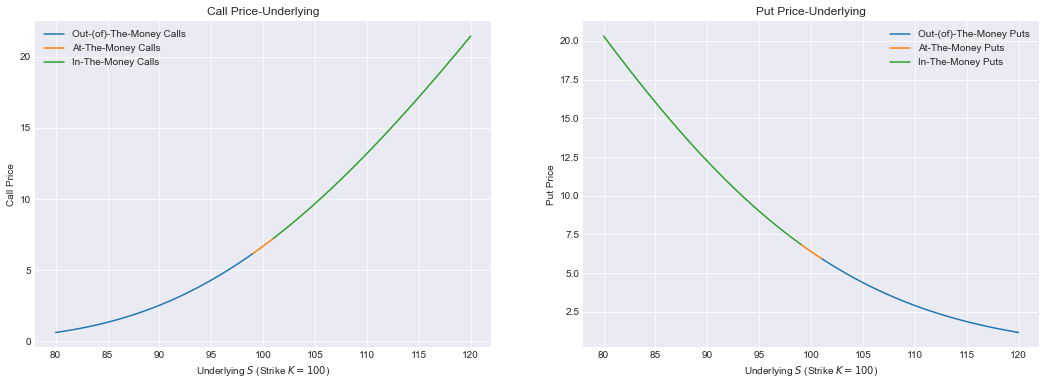

In [10]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

# Calls
ax[0].plot(SC_OTM, [c.price() for c in calls_OTM], label="Out-(of)-The-Money Calls")
ax[0].plot(SC_ATM, [c.price() for c in calls_ATM], label="At-The-Money Calls")
ax[0].plot(SC_ITM, [c.price() for c in calls_ITM], label="In-The-Money Calls")
ax[0].set_title("Call Price-Underlying")
ax[0].set_xlabel("Underlying $S$ (Strike $K=100$)")
ax[0].set_ylabel("Call Price")
ax[0].grid()
ax[0].legend()

# Puts
ax[1].plot(SP_OTM, [p.price() for p in puts_OTM], label="Out-(of)-The-Money Puts")
ax[1].plot(SP_ATM, [p.price() for p in puts_ATM], label="At-The-Money Puts")
ax[1].plot(SP_ITM, [p.price() for p in puts_ITM], label="In-The-Money Puts")
ax[1].set_title("Put Price-Underlying")
ax[1].set_xlabel("Underlying $S$ (Strike $K=100$)")
ax[1].set_ylabel("Put Price")
ax[1].grid()
ax[1].legend()

plt.show()

## The effect of time: price evolution 

In [11]:
# Fix a strike and the rest of parameters
K = 100
r = 0.01
sigma = 0.3 
q = 0

# Set of underlyings
S = np.linspace(80,120,100)

# Set of maturities
T = [2.5, 1.5, 0.9, 0.3, 0.1, 0.05, 0.02, 0]

# Calls and Puts
calls = [ [df.STKOption("C", s, K, t, r, sigma, q=q) for s in S] for t in T]
puts  = [ [df.STKOption("P", s, K, t, r, sigma, q=q) for s in S] for t in T]

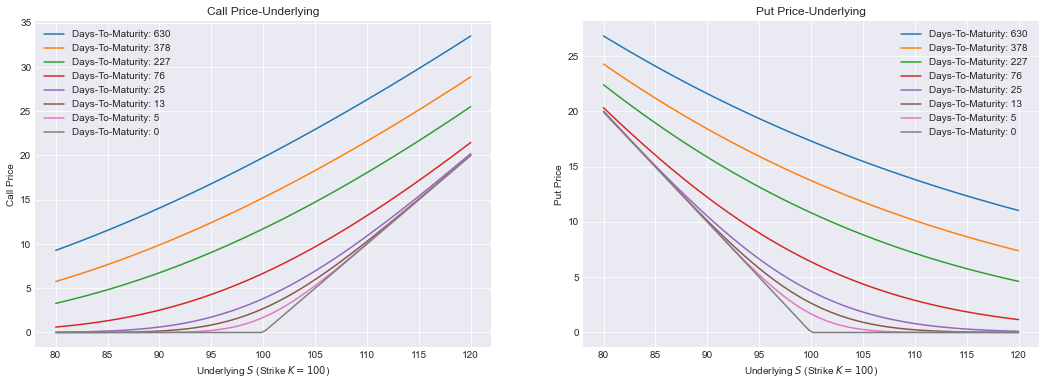

In [12]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

# Calls
for t in range(len(T)):
    ax[0].plot(S, [c.price() for c in calls[t]], label="Days-To-Maturity: {:.0f} ".format(round(T[t]*252,0)))
ax[0].set_title("Call Price-Underlying")
ax[0].set_xlabel("Underlying $S$ (Strike $K=100$)")
ax[0].set_ylabel("Call Price")
ax[0].grid()
ax[0].legend()

# Puts
for t in range(len(T)):
    ax[1].plot(S, [p.price() for p in puts[t]], label="Days-To-Maturity: {:.0f} ".format(round(T[t]*252,0)))
ax[1].set_title("Put Price-Underlying")
ax[1].set_xlabel("Underlying $S$ (Strike $K=100$)")
ax[1].set_ylabel("Put Price")
ax[1].grid()
ax[1].legend()

plt.show()

## The effect of volatility: 

In [13]:
# Set of volatility 
sigmas = np.linspace(0.01,1,100)

# Rest of parameters
S = 100
K = 100
T = 1
q = 0

# Different interest rates
r_1 = 0.1
r_2 = 0.05
r_3 = 0.01

# Calls and Puts
calls_1 = [ df.STKOption("C", S, K, T, r_1, ss, q=q) for ss in sigmas ]
puts_1  = [ df.STKOption("P", S, K, T, r_1, ss, q=q) for ss in sigmas ]

calls_2 = [ df.STKOption("C", S, K, T, r_2, ss, q=q) for ss in sigmas ]
puts_2  = [ df.STKOption("P", S, K, T, r_2, ss, q=q) for ss in sigmas ]

calls_3 = [ df.STKOption("C", S, K, T, r_3, ss, q=q) for ss in sigmas ]
puts_3  = [ df.STKOption("P", S, K, T, r_3, ss, q=q) for ss in sigmas ]

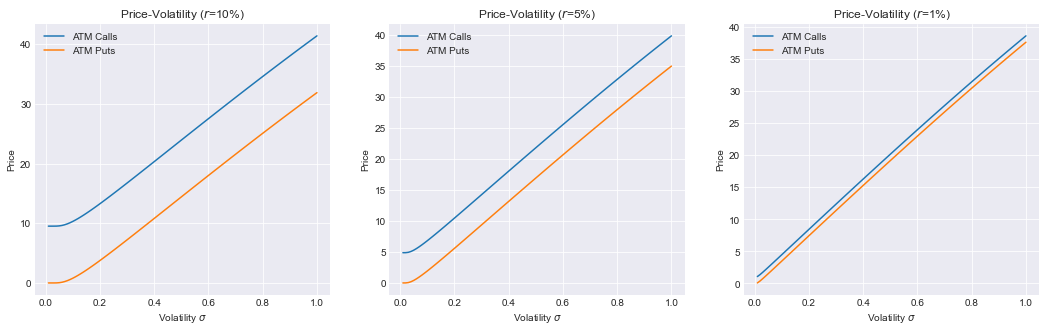

In [14]:
fig, ax = plt.subplots(1,3, figsize=(18,5)) 
ax = ax.flatten()

ax[0].plot(sigmas, [c.price() for c in calls_1], label="ATM Calls")
ax[0].plot(sigmas, [p.price() for p in puts_1],  label="ATM Puts")
ax[0].set_title("Price-Volatility ($r$={:.0f}%)".format(r_1*100))
ax[0].set_xlabel("Volatility $\sigma$")
ax[0].set_ylabel("Price")
ax[0].grid()
ax[0].legend()

ax[1].plot(sigmas, [c.price() for c in calls_2], label="ATM Calls")
ax[1].plot(sigmas, [p.price() for p in puts_2],  label="ATM Puts")
ax[1].set_title("Price-Volatility ($r$={:.0f}%)".format(r_2*100))
ax[1].set_xlabel("Volatility $\sigma$")
ax[1].set_ylabel("Price")
ax[1].grid()
ax[1].legend()

ax[2].plot(sigmas, [c.price() for c in calls_3], label="ATM Calls")
ax[2].plot(sigmas, [p.price() for p in puts_3],  label="ATM Puts")
ax[2].set_title("Price-Volatility ($r$={:.0f}%)".format(r_3*100))
ax[2].set_xlabel("Volatility $\sigma$")
ax[2].set_ylabel("Price")
ax[2].grid()
ax[2].legend()

plt.show()

## Payoff - Profit for a Long Call/Put

In [15]:
# Current Underlying
S0 = 100

# Fix a strike and the rest of parameters
K = 105
T = 0.5
r = 0.01
sigma = 0.2794
q = 0

# Current Call and Put price at maturity 
C = df.STKOption("C", S0, K, T, r, sigma, q=q).price()
P = df.STKOption("P", S0, K, T, r, sigma, q=q).price()
np.round(C,2), np.round(P,2)

(6.0, 10.48)

In [16]:
# Set of underlyings at maturity
S = np.linspace(85,125,150)

# At maturity 
T = 0

# Calls and Puts
calls = [ df.STKOption("C", s, K, T, r, sigma, q=q) for s in S ]
puts  = [ df.STKOption("P", s, K, T, r, sigma, q=q) for s in S ]

### Long Call/Put

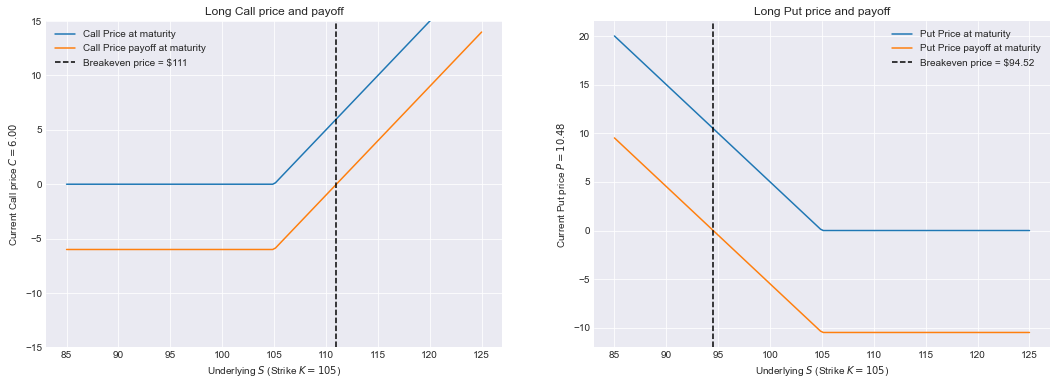

In [22]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

# Calls
ax[0].plot(S, [c.price() for c in calls],     label="Call Price at maturity")
ax[0].plot(S, [c.price() for c in calls] - C, label="Call Price payoff at maturity")
ax[0].axvline(x=K + C, color="k", linestyle="--", label="Breakeven price = ${:.0f}".format(K+C))
ax[0].set_title("Long Call price and payoff")
ax[0].set_xlabel("Underlying $S$ (Strike $K={:.0f}$)".format(K))
ax[0].set_ylabel("Current Call price $C={:.2f}$".format(C))
ax[0].set_ylim([-15,15])
ax[0].grid()
ax[0].legend()

# Puts
ax[1].plot(S, [p.price() for p in puts],     label="Put Price at maturity")
ax[1].plot(S, [p.price() for p in puts] - P, label="Put Price payoff at maturity")
ax[1].axvline(x=K - P, color="k", linestyle="--", label="Breakeven price = ${:.2f}".format(K-P))
ax[1].set_title("Long Put price and payoff")
ax[1].set_xlabel("Underlying $S$ (Strike $K={:.0f}$)".format(K))
ax[1].set_ylabel("Current Put price $P={:.2f}$".format(P))
ax[0].set_ylim([-15,15])
ax[1].grid()
ax[1].legend()

plt.show()

### Short Call/Put

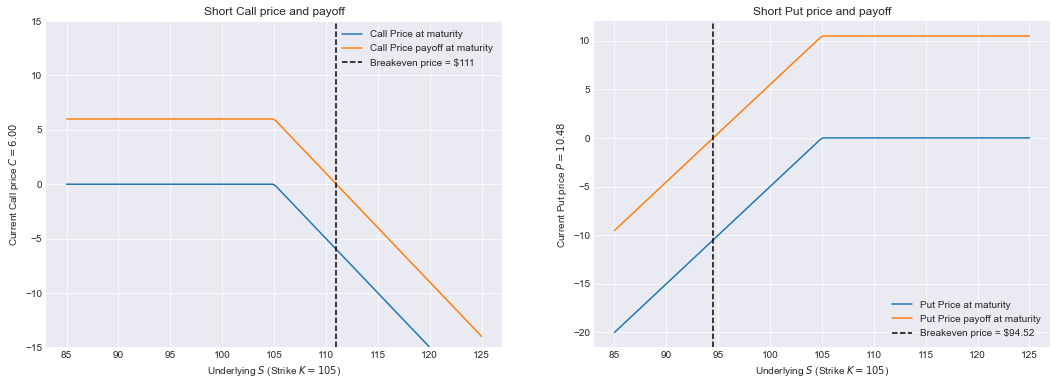

In [21]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

# Calls
ax[0].plot(S, [-c.price() for c in calls],     label="Call Price at maturity")
ax[0].plot(S, [-c.price() for c in calls] + C, label="Call Price payoff at maturity")
ax[0].axvline(x=K + C, color="k", linestyle="--", label="Breakeven price = ${:.0f}".format(K+C))
ax[0].set_title("Short Call price and payoff")
ax[0].set_xlabel("Underlying $S$ (Strike $K={:.0f}$)".format(K))
ax[0].set_ylabel("Current Call price $C={:.2f}$".format(C))
ax[0].set_ylim([-15,15])
ax[0].grid()
ax[0].legend()

# Puts
ax[1].plot(S, [-p.price() for p in puts],     label="Put Price at maturity")
ax[1].plot(S, [-p.price() for p in puts] + P, label="Put Price payoff at maturity")
ax[1].axvline(x=K - P, color="k", linestyle="--", label="Breakeven price = ${:.2f}".format(K-P))
ax[1].set_title("Short Put price and payoff")
ax[1].set_xlabel("Underlying $S$ (Strike $K={:.0f}$)".format(K))
ax[1].set_ylabel("Current Put price $P={:.2f}$".format(P))
ax[0].set_ylim([-15,15])
ax[1].grid()
ax[1].legend()

plt.show()